# **Step 1: Import Libraries & Load Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('new_retail_data.csv')

# Preview
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


# **Step 2: Basic Data Cleaning and Preparation**

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Transaction_ID,333
Customer_ID,308
Name,382
Email,347
Phone,362
Address,315
City,248
State,281
Zipcode,340
Country,271


In [ ]:
# Calculate percentage of nulls per column
null_percentage = df.isnull().mean() * 100

# Format percentages with '%' symbol
null_summary = pd.DataFrame({
    'Column': null_percentage.index,
    'Null_Percentage': null_percentage.apply(lambda x: f"{x:.2f} %")
})

# Sort descending
null_summary = null_summary.sort_values(by='Null_Percentage', ascending=False)

# Display
print(null_summary)

                              Column Null_Percentage
Name                            Name          0.13 %
Year                            Year          0.12 %
Date                            Date          0.12 %
Phone                          Phone          0.12 %
Total_Amount            Total_Amount          0.12 %
Amount                        Amount          0.12 %
Total_Purchases      Total_Purchases          0.12 %
Time                            Time          0.12 %
Shipping_Method      Shipping_Method          0.11 %
Transaction_ID        Transaction_ID          0.11 %
Zipcode                      Zipcode          0.11 %
Email                          Email          0.11 %
Address                      Address          0.10 %
Payment_Method        Payment_Method          0.10 %
Income                        Income          0.10 %
Customer_ID              Customer_ID          0.10 %
Gender                        Gender          0.10 %
Country                      Country          

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Verify if there are still missing values
df.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
Name,0
Email,0
Phone,0
Address,0
City,0
State,0
Zipcode,0
Country,0


In [ ]:
# Check for exact duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 3


In [ ]:
# Drop exact duplicate rows
df.drop_duplicates(inplace=True)

# Verify if there are still exact duplicate rows
duplicates_after_drop = df[df.duplicated()]
print(f"Number of duplicate rows after dropping: {duplicates_after_drop.shape[0]}")


Number of duplicate rows after dropping: 0


In [ ]:
# Check for duplicate 'CustomerID'
duplicate_Customer_IDs = df[df.duplicated(subset=['Customer_ID'], keep=False)]

# Print the count of rows with duplicate CustomerIDs
print(f"Number of rows with duplicate CustomerIDs: {duplicate_Customer_IDs.shape[0]}")

Number of rows with duplicate CustomerIDs: 282498


In [ ]:
# Create a new customer ID based on unique emails
df['New_Customer_ID'] = df['Email'].astype('category').cat.codes + 10000  # Start at 10000 for consistency

# Drop or archive the old Customer_ID
df.drop(columns=['Customer_ID'], inplace=True)
df.head()

,Transaction_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,...,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,New_Customer_ID
0,8691788.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,...,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,26389
1,2174773.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,...,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,44896
2,6679610.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,...,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,54610
3,7232460.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,...,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,45231
4,4983775.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,...,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,19522


In [ ]:
#Check the shape of the dataset
df.shape

(293908, 30)

In [ ]:
#Check the datatypes
df.dtypes

,0
Transaction_ID,float64
Name,object
Email,object
Phone,float64
Address,object
City,object
State,object
Zipcode,float64
Country,object
Age,float64


In [ ]:
# Convert IDs and phone to string
df['Transaction_ID'] = df['Transaction_ID'].astype(str)
df['New_Customer_ID'] = df['New_Customer_ID'].astype(str)
df['Phone'] = df['Phone'].astype(str)
df['Zipcode'] = df['Zipcode'].astype(str)

# Numeric conversions
df['Age'] = df['Age'].astype('Int64')
df['Year'] = df['Year'].astype('Int64')
df['Total_Purchases'] = df['Total_Purchases'].astype('Int64')
df['Ratings'] = df['Ratings'].astype('Int64')
df['Total_Purchases'] = df['Total_Purchases'].astype('Int64')

# Date/time conversion
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].dt.date

#Categorical columns
cat_cols = [
    'Gender', 'Income', 'Customer_Category', 'Product_Category', 'Product_Brand',
    'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Month'
]
df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
df.dtypes

,0
Transaction_ID,object
Name,object
Email,object
Phone,object
Address,object
City,object
State,object
Zipcode,object
Country,object
Age,Int64


In [ ]:
#Check for summary statistics
df.describe()

,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,293908.0,293908.0,293908.0,293908.000000,293908.000000,293908.0
mean,35.46553,2023.165127,5.359837,255.153875,1367.684180,3.16232
std,15.017638,0.371295,2.868441,141.389109,1128.898840,1.320755
min,18.0,2023.0,1.0,10.000219,10.003750,1.0
25%,22.0,2023.0,3.0,132.837594,438.844052,2.0
50%,32.0,2023.0,5.0,255.464523,1041.164290,3.0
75%,46.0,2023.0,8.0,377.639394,2028.951754,4.0
max,70.0,2024.0,10.0,499.997911,4999.625796,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293908 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Transaction_ID     293908 non-null  object  
 1   Name               293908 non-null  object  
 2   Email              293908 non-null  object  
 3   Phone              293908 non-null  object  
 4   Address            293908 non-null  object  
 5   City               293908 non-null  object  
 6   State              293908 non-null  object  
 7   Zipcode            293908 non-null  object  
 8   Country            293908 non-null  object  
 9   Age                293908 non-null  Int64   
 10  Gender             293908 non-null  category
 11  Income             293908 non-null  category
 12  Customer_Category  293908 non-null  category
 13  Date               293908 non-null  object  
 14  Year               293908 non-null  Int64   
 15  Month              293908 non-null  cat

# **Step 3: Exploratory Data Analysis**

# Customer Demographics Analysis

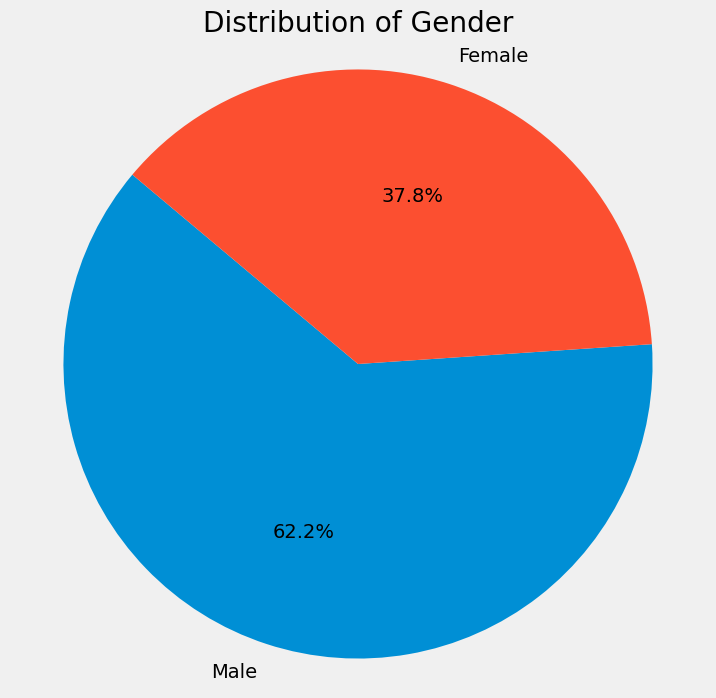

In [ ]:
# Group data by gender and count the occurrences
gender_counts = df['Gender'].value_counts()

# Define colors for each slice (gender)
colors = ['lightblue', 'lightcoral']  # You can add more colors if you have more genders

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<Axes: title={'center': 'Category by Income'}, xlabel='Income'>

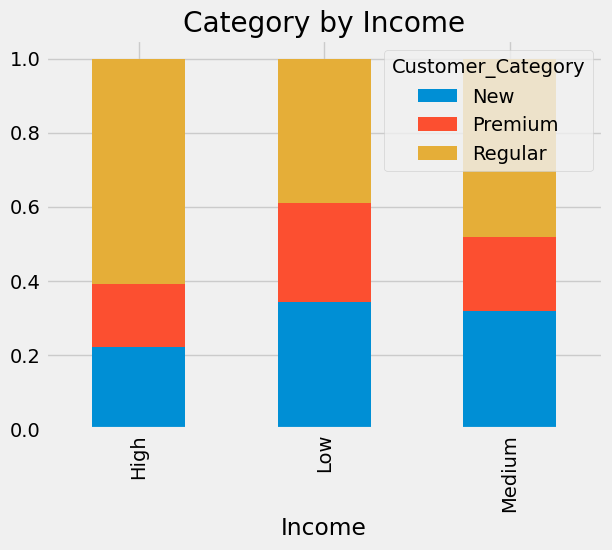

In [ ]:
# Income & Segment
pd.crosstab(df['Income'], df['Customer_Category'], normalize='index').plot(kind='bar', stacked=True, title='Category by Income')

<Axes: title={'center': 'Top Countries'}, ylabel='Country'>

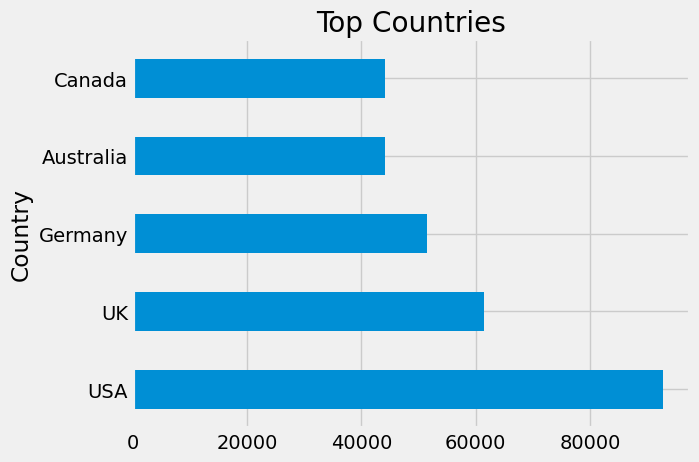

In [ ]:
# Country/State Distribution
df['Country'].value_counts().head(10).plot(kind='barh', title='Top Countries')

# Product & Category Analysis

<Axes: title={'center': 'Top Product Categories'}, xlabel='Product_Category'>

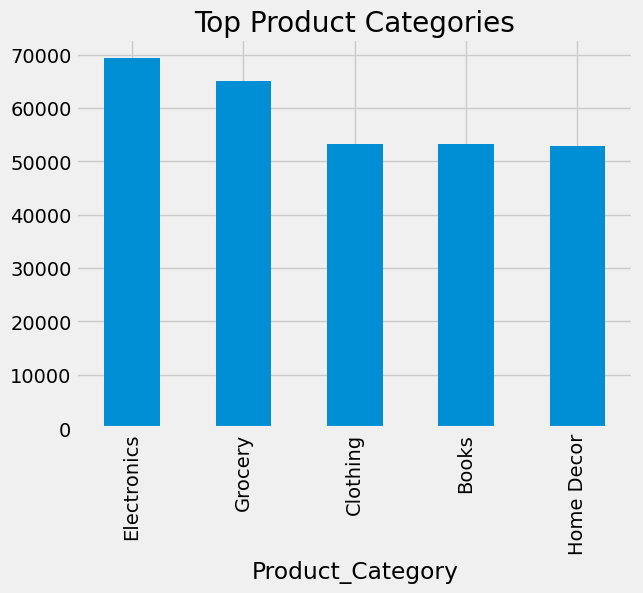

In [ ]:
# Top Product Categories
df['Product_Category'].value_counts().plot(kind='bar', title='Top Product Categories')

/tmp/ipython-input-20-1849315414.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_category = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)


<Axes: title={'center': 'Revenue by Product Category'}, xlabel='Product_Category'>

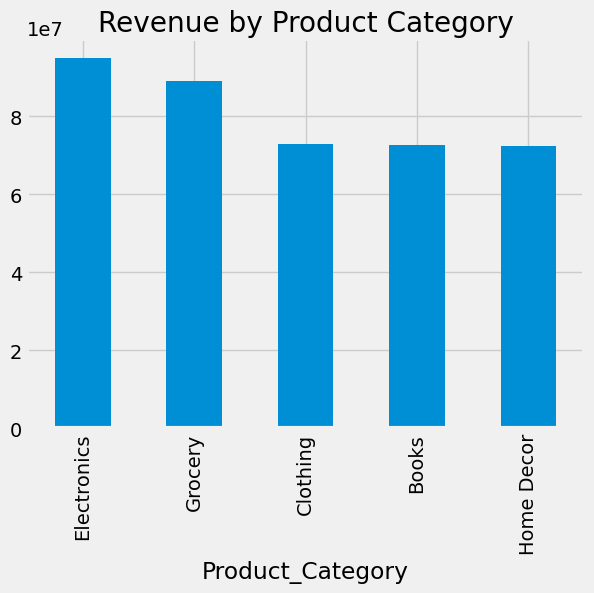

In [ ]:
# Revenue by Category
revenue_by_category = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)
revenue_by_category.plot(kind='bar', title='Revenue by Product Category')

/tmp/ipython-input-21-3317144702.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Product_Category')['Ratings'].mean().sort_values().plot(kind='barh', title='Avg Ratings by Category')


<Axes: title={'center': 'Avg Ratings by Category'}, ylabel='Product_Category'>

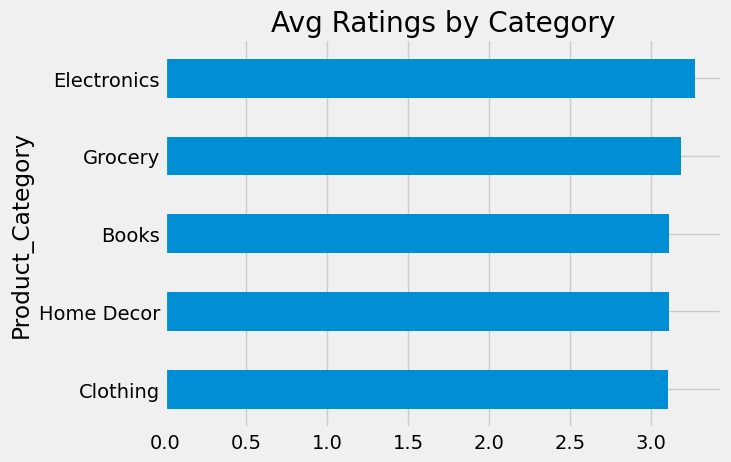

In [ ]:
# Ratings by Category
df.groupby('Product_Category')['Ratings'].mean().sort_values().plot(kind='barh', title='Avg Ratings by Category')

#Transaction Behavior Analysis

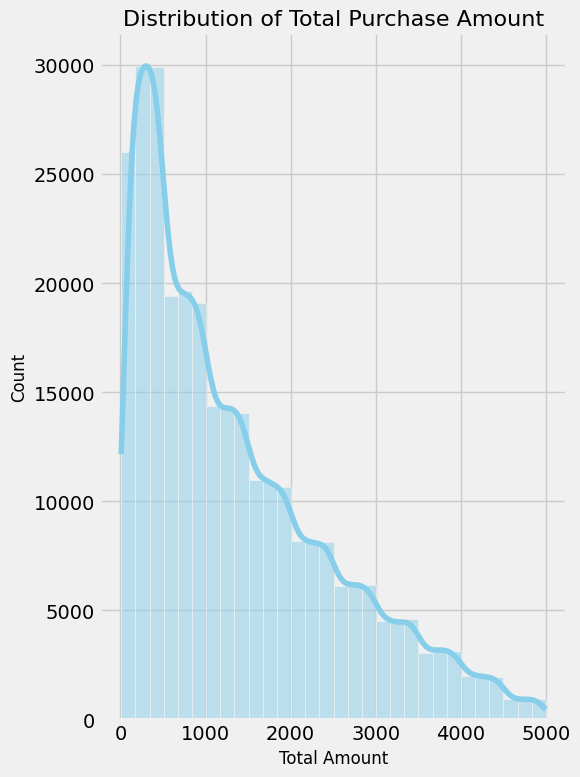

In [ ]:
# Purchase Amount Distribution
plt.figure(figsize=(6, 8))
sns.histplot(df['Total_Amount'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Purchase Amount", fontsize=16)
plt.xlabel("Total Amount", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

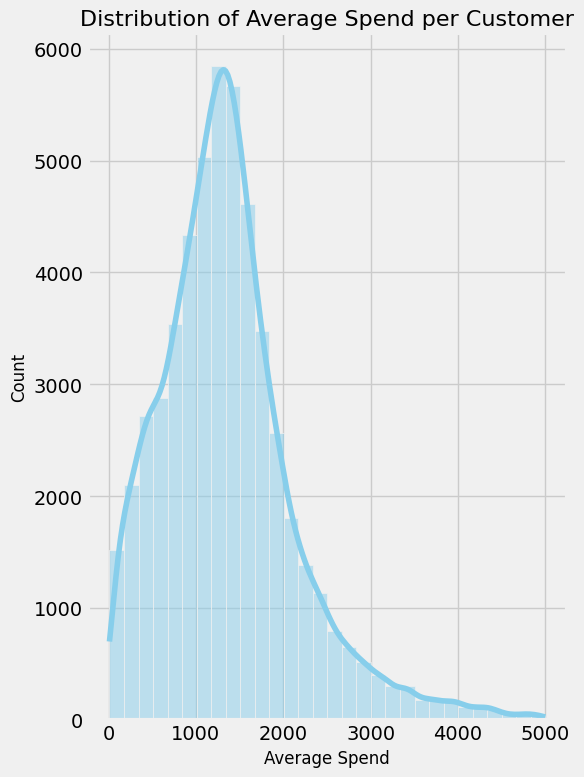

In [ ]:
# First, compute average spend per customer
avg_spend = df.groupby('New_Customer_ID')['Total_Amount'].mean()

plt.figure(figsize=(6, 8))
sns.histplot(avg_spend, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Average Spend per Customer", fontsize=16)
plt.xlabel("Average Spend", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# RFM snapshot
rfm = df.groupby('New_Customer_ID').agg({
    'Date': lambda x: (pd.Timestamp.today().date() - max(x)).days,
    'Transaction_ID': 'count',
    'Total_Amount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
print(rfm.describe())

            Recency     Frequency       Monetary
count  52530.000000  52530.000000   52530.000000
mean     593.511289      5.595050    7652.261985
std       96.327468      7.609379   10758.794785
min      492.000000      1.000000      10.362214
25%      515.000000      1.000000    1648.938341
50%      560.000000      3.000000    3923.830350
75%      650.000000      6.000000    8908.543045
max      857.000000     92.000000  130210.031700


#Time-Based Analysis

/tmp/ipython-input-25-2890541198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='Blues_r')


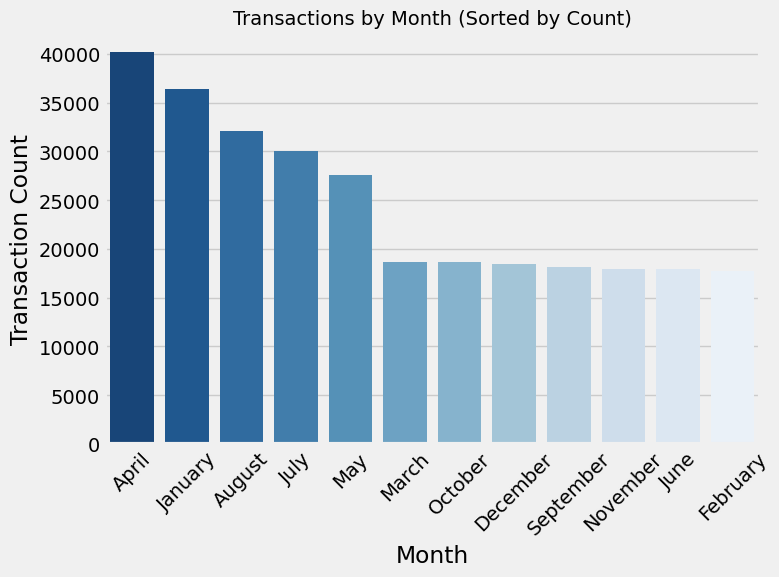

In [ ]:
# Transactions per Month
df['Month'] = df['Month'].astype(str)

month_counts = df['Month'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='Blues_r')
plt.title('Transactions by Month (Sorted by Count)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-26-2194316102.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='Purples_r')


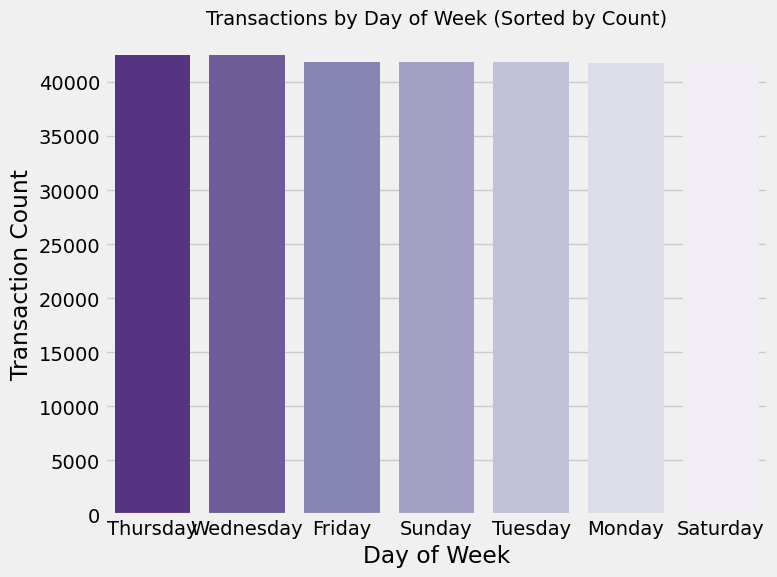

In [ ]:
# Day of Week Analysis
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.day_name()

day_counts = df['DayOfWeek'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='Purples_r')
plt.title('Transactions by Day of Week (Sorted by Count)', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

/tmp/ipython-input-27-3462290232.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='coolwarm')


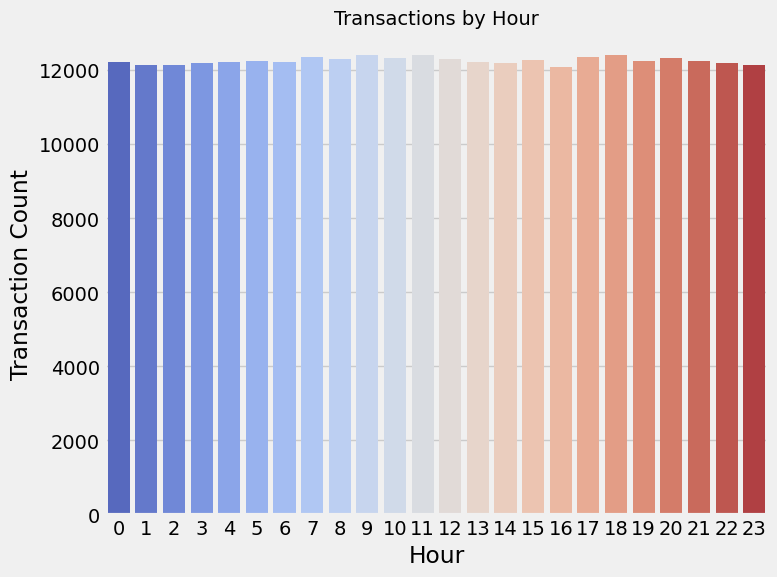

In [ ]:
# Hourly Purchases
# Ensure Time column is string type
df['Time'] = df['Time'].astype(str)

# Extract hour as integer
df['Hour'] = df['Time'].str.slice(0, 2).astype(int)

hour_counts = df['Hour'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='coolwarm')
plt.title('Transactions by Hour', fontsize=14)
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

#Operational & Payment Insights

<Axes: title={'center': 'Payment Method Distribution'}, ylabel='proportion'>

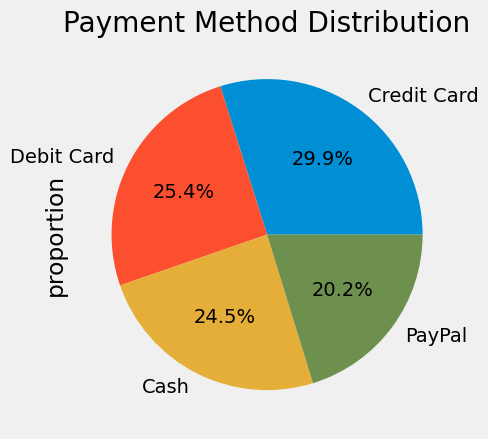

In [ ]:
# Payment Method Usage
df['Payment_Method'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', title='Payment Method Distribution')

<Axes: title={'center': 'Shipping Preferences'}, xlabel='Shipping_Method'>

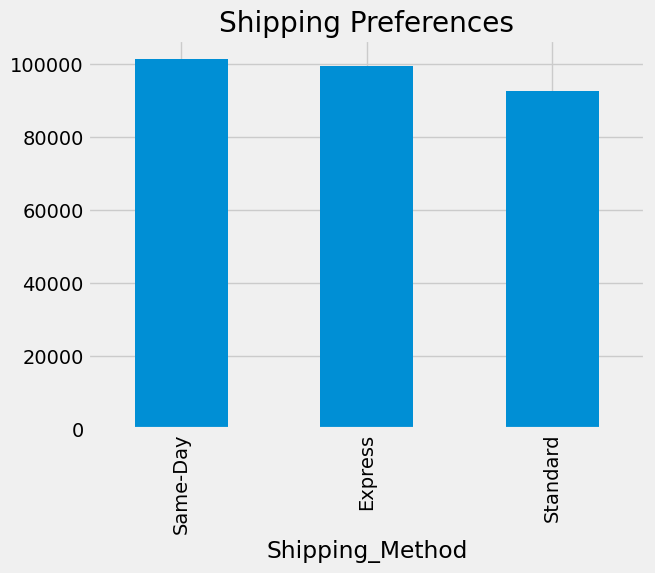

In [ ]:
# Shipping Method
df['Shipping_Method'].value_counts().plot(kind='bar', title='Shipping Preferences')

<Axes: title={'center': 'Order Status Overview'}, xlabel='Order_Status'>

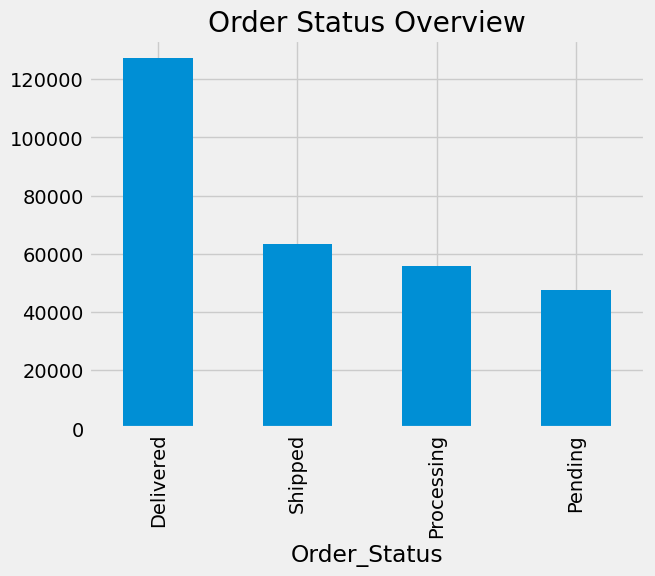

In [ ]:

# Order Status
df['Order_Status'].value_counts().plot(kind='bar', title='Order Status Overview')

#Customer Experience & Feedback

<Axes: title={'center': 'Customer Ratings'}, xlabel='Ratings'>

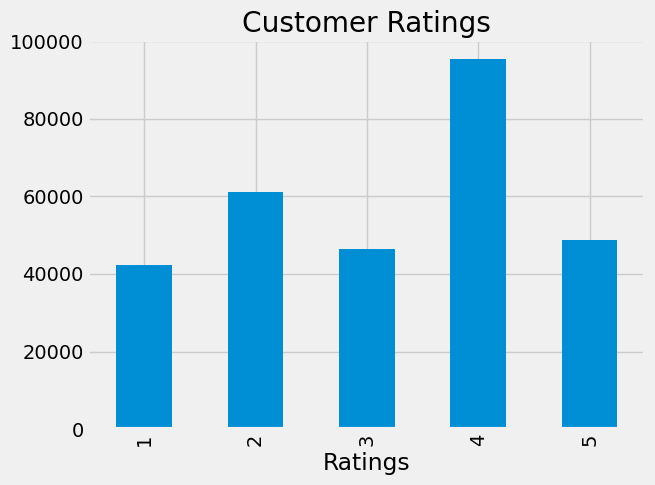

In [ ]:
# Ratings Distribution
df['Ratings'].value_counts().sort_index().plot(kind='bar', title='Customer Ratings')

<Axes: title={'center': 'Customer Feedback Sentiment'}, xlabel='Feedback'>

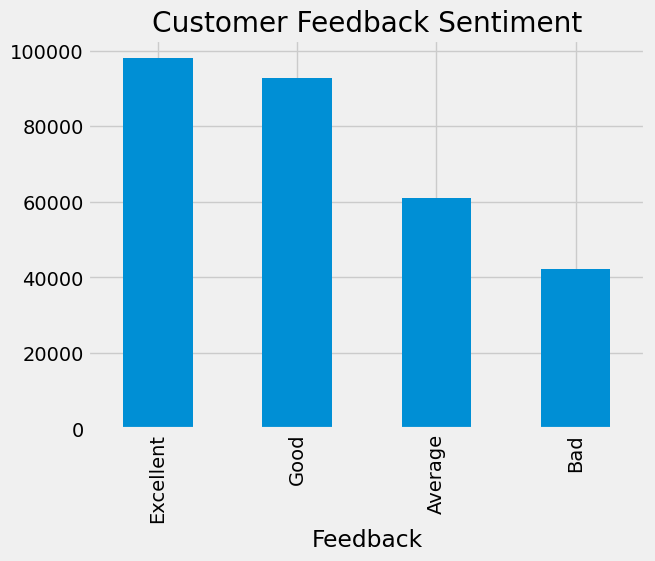

In [ ]:
# Feedback Breakdown
df['Feedback'].value_counts().plot(kind='bar', title='Customer Feedback Sentiment')

#Step 4: Clustering Scenarios

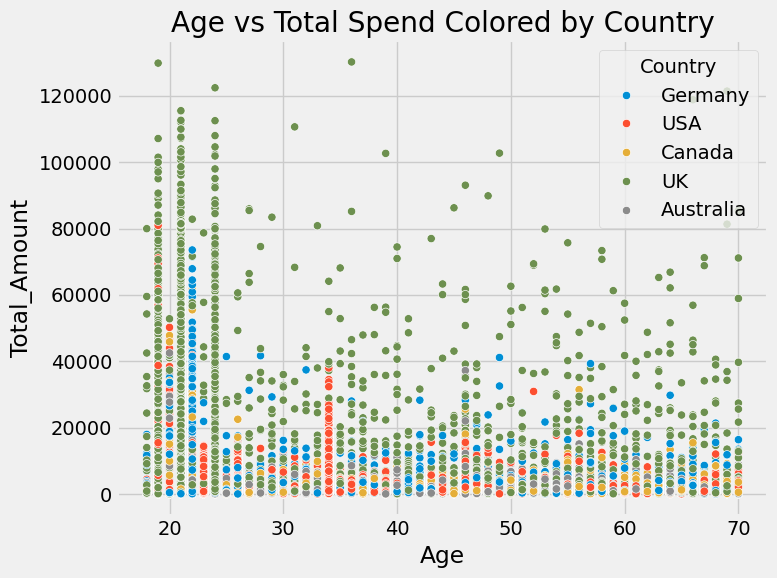

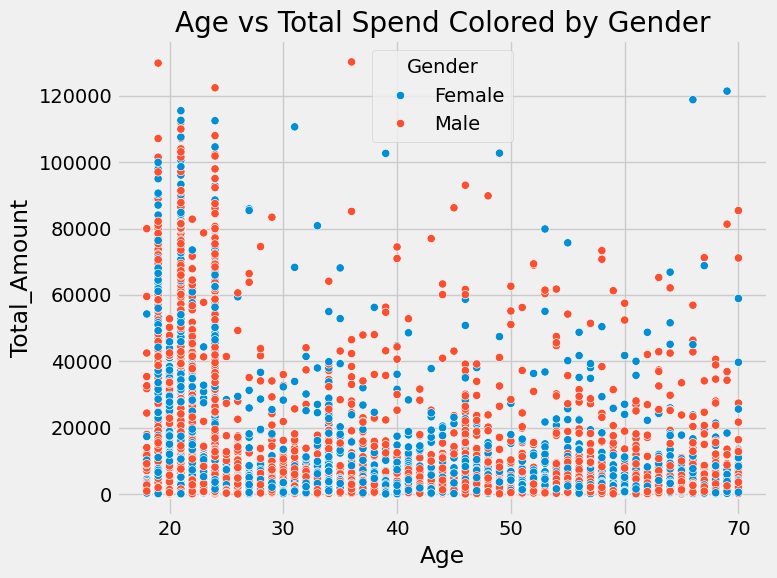

In [ ]:
#Age vs Total Spend (Colored by Country or Gender)
plot1 = df.groupby('New_Customer_ID').agg({
    'Age': 'first',
    'Total_Amount': 'sum',
    'Country': 'first',
    'Gender': 'first'
}).reset_index()

# Scatter: Age vs Total Spend
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot1, x='Age', y='Total_Amount', hue='Country')
plt.title('Age vs Total Spend Colored by Country')
plt.tight_layout()
plt.show()

# Try with Gender too
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot1, x='Age', y='Total_Amount', hue='Gender')
plt.title('Age vs Total Spend Colored by Gender')
plt.tight_layout()
plt.show()

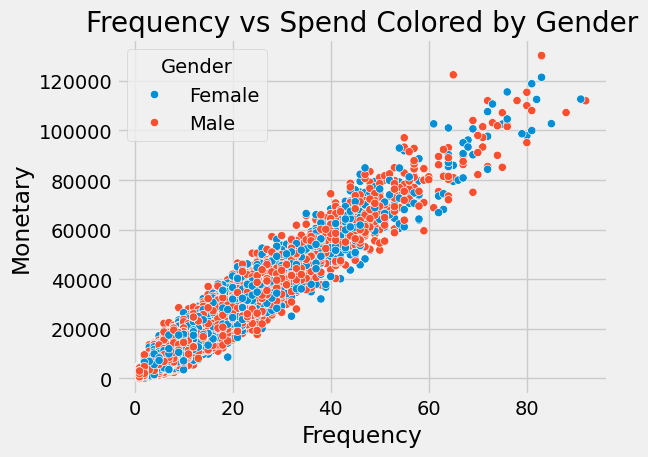

In [ ]:
# Frequency vs Total Spend (Colored by Gender)
plot2 = df.groupby('New_Customer_ID').agg({
    'Transaction_ID': 'count',
    'Total_Amount': 'sum',
    'Gender': 'first'
}).reset_index()
plot2.columns = ['New_Customer_ID', 'Frequency', 'Monetary', 'Gender']

sns.scatterplot(data=plot2, x='Frequency', y='Monetary', hue='Gender')
plt.title('Frequency vs Spend Colored by Gender')
plt.tight_layout()
plt.show()

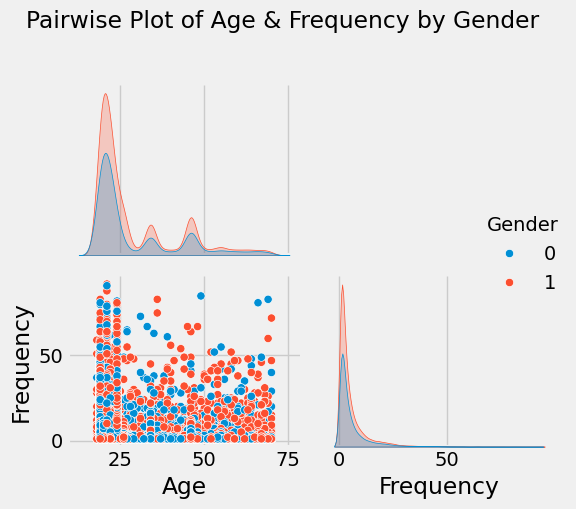

In [ ]:
# Pair Plot — Age, Frequency, Country, Gender
from sklearn.preprocessing import LabelEncoder

plot3 = df.groupby('New_Customer_ID').agg({
    'Age': 'first',
    'Transaction_ID': 'count',
    'Country': 'first',
    'Gender': 'first'
}).reset_index()
plot3.columns = ['New_Customer_ID', 'Age', 'Frequency', 'Country', 'Gender']

# Encode Country and Gender for plotting
plot3['Country'] = LabelEncoder().fit_transform(plot3['Country'])
plot3['Gender'] = LabelEncoder().fit_transform(plot3['Gender'])

sns.pairplot(plot3, vars=['Age', 'Frequency'], hue='Gender', corner=True)
plt.suptitle('Pairwise Plot of Age & Frequency by Gender', y=1.02)
plt.tight_layout()
plt.show()

# **Step 5 : Elbow Method for Determining Number of Clusters**

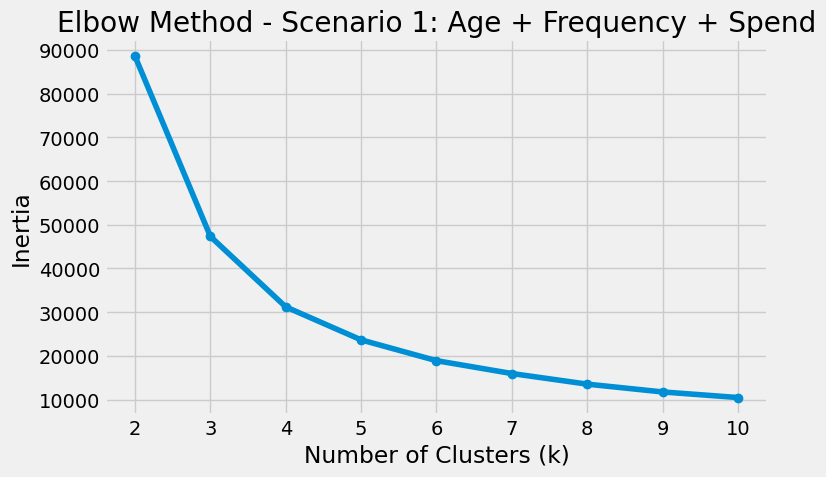

In [ ]:
# Scenario 1 alone: Age + Frequency + Spend

# Step 1: Aggregate data
scenario_1 = df.groupby('New_Customer_ID').agg({
    'Age': 'first',
    'Transaction_ID': 'count',        # Frequency
    'Total_Amount': 'sum'             # Monetary
}).reset_index()

scenario_1.columns = ['New_Customer_ID', 'Age', 'Frequency', 'Monetary']

# Step 2: Scale features
scaler = StandardScaler()
X1 = scaler.fit_transform(scenario_1[['Age', 'Frequency', 'Monetary']])

# Step 3: Elbow Method
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

# Step 4: Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - Scenario 1: Age + Frequency + Spend")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

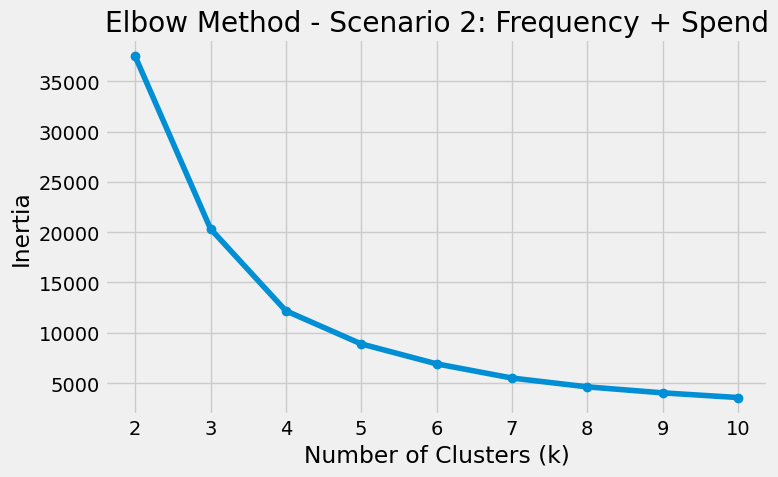

In [ ]:
# Scenario 2: Frequency + Spend
# Step 1: Aggregate data
scenario_2 = df.groupby('New_Customer_ID').agg({
    'Transaction_ID': 'count',        # Frequency
    'Total_Amount': 'sum'             # Monetary
}).reset_index()

scenario_2.columns = ['New_Customer_ID', 'Frequency', 'Monetary']

# Step 2: Scale features
scaler = StandardScaler()
X2 = scaler.fit_transform(scenario_2[['Frequency', 'Monetary']])

# Step 3: Elbow Method
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

# Step 4: Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - Scenario 2: Frequency + Spend")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

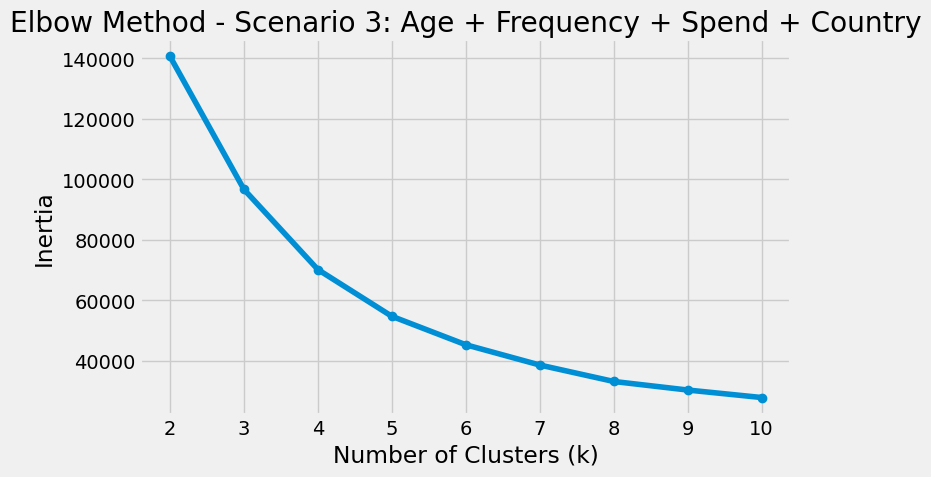

In [ ]:
# Scenario 3: Age + Frequency + Spend + Country
# Step 1: Aggregate data
scenario_3 = df.groupby('New_Customer_ID').agg({
    'Age': 'first',
    'Transaction_ID': 'count',         # Frequency
    'Total_Amount': 'sum',             # Monetary
    'Country': 'first'
}).reset_index()

scenario_3.columns = ['New_Customer_ID', 'Age', 'Frequency', 'Monetary', 'Country']

# Step 2: Encode Country (categorical)
le = LabelEncoder()
scenario_3['Country_Encoded'] = le.fit_transform(scenario_3['Country'])

# Step 3: Scale features
X3 = scenario_3[['Age', 'Frequency', 'Monetary', 'Country_Encoded']]
X3_scaled = StandardScaler().fit_transform(X3)

# Step 4: Elbow Method
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X3_scaled)
    inertia.append(kmeans.inertia_)

# Step 5: Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - Scenario 3: Age + Frequency + Spend + Country")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

# **Step 6 : Clustering**

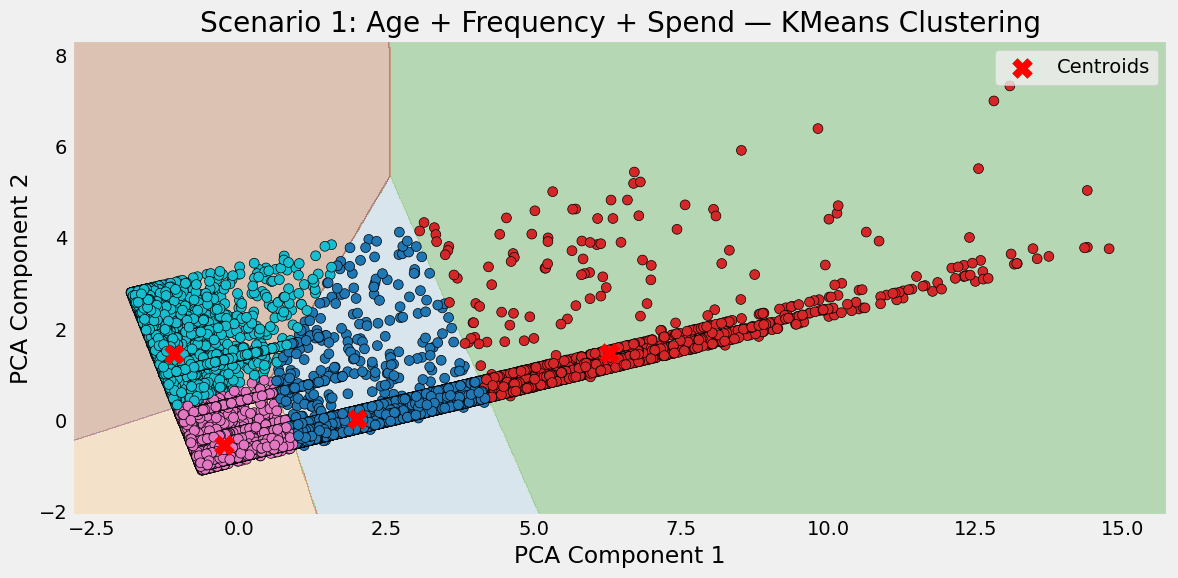

In [ ]:
# Scenario 1: Age + Frequency + Spend (k=4)
from matplotlib.colors import ListedColormap

# Prepare data
scenario1 = df.groupby('New_Customer_ID').agg({
    'Age': 'first',
    'Transaction_ID': 'count',
    'Total_Amount': 'sum'
}).reset_index()
scenario1.columns = ['New_Customer_ID', 'Age', 'Frequency', 'Monetary']

# Features
X1 = scenario1[['Age', 'Frequency', 'Monetary']]

# Scale
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)

# KMeans (k=4)
kmeans1 = KMeans(n_clusters=4, random_state=42, n_init=10)
scenario1['Cluster'] = kmeans1.fit_predict(X_scaled1)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled1)
centroids_pca = pca.transform(kmeans1.cluster_centers_)

# Decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))
Z = kmeans1.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(plt.cm.Paired.colors), alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=scenario1['Cluster'], cmap='tab10', s=50, edgecolors='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("Scenario 1: Age + Frequency + Spend — KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()


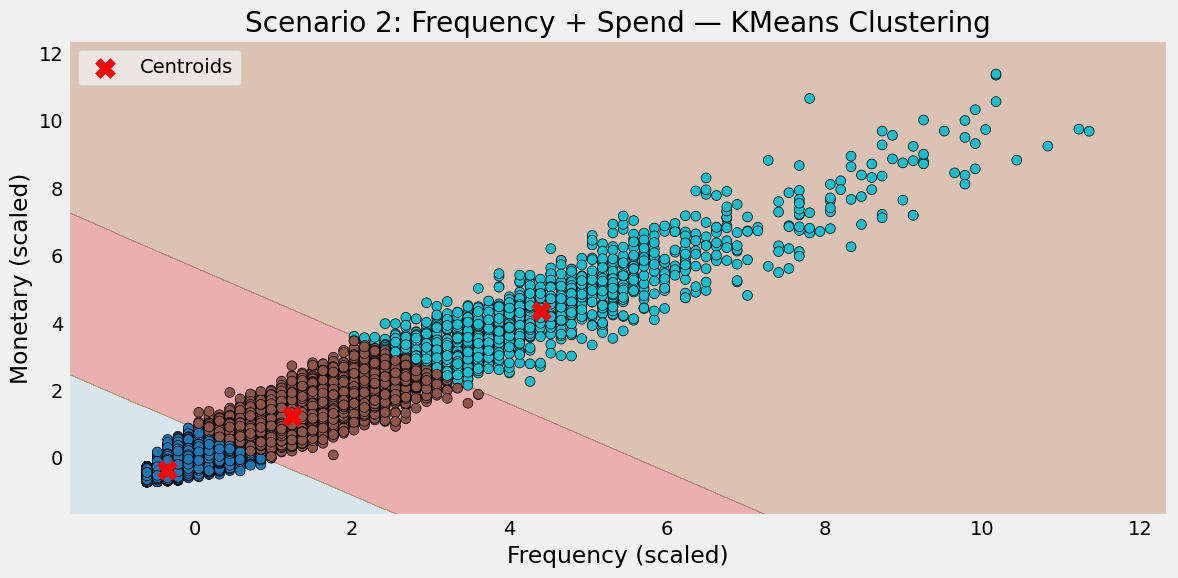

In [ ]:
# Prepare scenario 2 data
scenario2 = df.groupby('New_Customer_ID').agg({
    'Transaction_ID': 'count',
    'Total_Amount': 'sum'
}).reset_index()
scenario2.columns = ['New_Customer_ID', 'Frequency', 'Monetary']

# Features
X2 = scenario2[['Frequency', 'Monetary']]

# Scaling
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)

# KMeans Clustering
kmeans2 = KMeans(n_clusters=3, random_state=42, n_init=10)  # You previously identified k=3
scenario2['Cluster'] = kmeans2.fit_predict(X_scaled2)

# No PCA needed — already 2D
X_vis = X_scaled2
centroids = kmeans2.cluster_centers_

# Decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))
Z = kmeans2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(plt.cm.Paired.colors), alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=scenario2['Cluster'], cmap='tab10', s=50, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("Scenario 2: Frequency + Spend — KMeans Clustering")
plt.xlabel("Frequency (scaled)")
plt.ylabel("Monetary (scaled)")
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
# Count how many customers in each cluster (Scenario 1)
pd.Series(kmeans1.labels_).value_counts().sort_index()

,count
0,6893
1,1189
2,33179
3,11269


In [ ]:
# Count how many customers in each cluster (Scenario 2)
pd.Series(kmeans2.labels_).value_counts().sort_index()

,count
0,43565
1,7644
2,1321


In [ ]:
# Get distinct New_Customer_IDs as a one-column DataFrame
customer_level_df = df[['New_Customer_ID','Email']].drop_duplicates().reset_index(drop=True)

In [ ]:
customer_level_df

,New_Customer_ID
0,26389
1,44896
2,54610
3,45231
4,19522
...,...
52525,38061
52526,31800
52527,38138
52528,43600


In [ ]:
# Add cluster labels to df
customer_level_df['Cluster_S1'] = kmeans1.labels_
customer_level_df['Cluster_S2'] = kmeans2.labels_

In [ ]:
customer_level_df

,New_Customer_ID,Email,Cluster_S1,Cluster_S2
0,26389,Ebony39@gmail.com,0,1
1,44896,Mark36@gmail.com,0,1
2,54610,Shane85@gmail.com,0,1
3,45231,Mary34@gmail.com,2,1
4,19522,Charles30@gmail.com,2,0
...,...,...,...,...
52525,38061,Karina46@gmail.com,3,0
52526,31800,Isaiah45@gmail.com,3,0
52527,38138,Karl9@gmail.com,3,0
52528,43600,Madeline91@gmail.com,2,0


In [ ]:
# Map numerical cluster labels to descriptive names
cluster_map_s1 = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}
cluster_map_s2 = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}

customer_level_df['Cluster_S1'] = customer_level_df['Cluster_S1'].map(cluster_map_s1)
customer_level_df['Cluster_S2'] = customer_level_df['Cluster_S2'].map(cluster_map_s2)

customer_level_df

,New_Customer_ID,Email,Cluster_S1,Cluster_S2
0,26389,Ebony39@gmail.com,Cluster 1,Cluster 2
1,44896,Mark36@gmail.com,Cluster 1,Cluster 2
2,54610,Shane85@gmail.com,Cluster 1,Cluster 2
3,45231,Mary34@gmail.com,Cluster 3,Cluster 2
4,19522,Charles30@gmail.com,Cluster 3,Cluster 1
...,...,...,...,...
52525,38061,Karina46@gmail.com,Cluster 4,Cluster 1
52526,31800,Isaiah45@gmail.com,Cluster 4,Cluster 1
52527,38138,Karl9@gmail.com,Cluster 4,Cluster 1
52528,43600,Madeline91@gmail.com,Cluster 3,Cluster 1


In [ ]:
#Export the clusters
customer_level_df.to_csv('customer_level_clusters.csv', index=False)